### Luis Arce https://github.com/LuisVArce
### Tim Keriazes https://github.com/tim-keriazes
### Joshua Mayes https://github.com/MrEnigmamgine

#### Oct 5, 2022

# Red Wine From the Vihno Verde Region in Portugal - Predicting the Quality Score Using Machine Learning

#### Scenario

#### Project Description:
##### Our project examines 11 quantitative features of red/white wine data sets from the Vihno Verde region of Portugal. Using the physicochemical features/breakdown of the wine, we built a predictive machine learning model with a target variable of quality score. Our insights, discoveries, and modeling offer a distinct advantage to wine producers/stakeholders/distributors by using a wine's chemical composition and predicting its associated quality score.


#### Project Planning/Outline:
1. Intro
2. Acquire
3. Prepare/Wrangle
4. Split
5. Exploration Highlights
6. Stats Tests?
7. Scale
8. Clusters
9. Modeling
10. Conclusion
11. Next Steps

#### Initial Hypotheses
1. Sugar and alcohol content directly to correlates to wine density
2. For white wines, the higher acid content the higher quality
3. For red wines, residual sugar content lowers quality score
4. Sulfates will have negative impact on quality for both
5. High volitile acid content lowers quality for both
6. White and red wines may need predicted separately

### Target variable
#### quality
- Quality score is the median score given to associated wine based off the rankings of three industry experts


# Best Model: 

## Red Wine Data Set
## 2nd Degree Polynomial Regressor:

### Summary
-Following the evaluation and extensive modeling, I narrowed down the feature set to the following:
        -'volatile_acidity' 
        -'citric_acid' 
        -'density' 
        -'alcohol' 
        -'ions' 
        -'hydronium'
        -'additives'

The best performing model was the polynomial Regressor of the second degree. It performed best on both the training and validate sets, beating the baseline rmse on both the train and validate sets:
     
   ###  Training/In-Sample: 0.603 beating baseline RMSE of .827 by .220
   ### Validation/Out-of-Sample: 0.685 beating baseline RMSE of .844 by .159. 
   
### Finally, the model performed well with a RMSE on the test set of .738 beating the RMSE on the baseline of .816 by .078

-Next Steps: I would like to look at determining which features were the best features and adjusting accordingly. I found that the features I selected for final modeling yielded the greatest improvement in RMSE versus baseline, but potentially another combination of features/clusters could prove valueable. Feature enginneering proved worthwhile, ended up using three of the features in the final model. Potentially use the another cluster feature and a few others in order to improve model performance.
-Further analysis would allow for application of different clusters created and applied to the model.

## White Wine Data Set
### 3rd Degree Polynomial Regressor:

## White Wine Modeling Summary
-Following the evaluation and extensive modeling, I narrowed down the feature set to the following:
        -'volatile_acidity' 
        -'citric_acid' 
        -'density' 
        -'alcohol' 
        -'ions' 
        -'hydronium'
        -'additives'

The best performing model was the polynomial Regressor of the third degree. It performed best on both the training and validate sets, beating the baseline rmse on both the train and validate sets:
     
   ###  Training/In-Sample: 0.726 beating baseline RMSE of 0.904 by .178
   ### Validation/Out-of-Sample: 0.838 beating baseline RMSE of 0.902 by .064. 
   
## Finally, the model performed well with a RMSE on the test set of .838 beating the RMSE on the baseline of .893 by .055

-Next Steps: I would like to look at determining which features were the best features and adjusting accordingly. I found that the features I selected for final modeling yielded the greatest improvement in RMSE versus baseline, but potentially another combination of features/clusters could prove valueable. Feature enginneering proved worthwhile, ended up using three of the features in the final model. Potentially use the another cluster feature and a few others in order to improve model performance.
-Further analysis would allow for application of different clusters created and applied to the model.


### Imports/Dependencies

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster 

#functions

import model
import acquire
import wrangle as wr
import warnings
warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


### Scope
The dataset includes 6,497 observations. 0 of which contain nulls and 1,177 of which are duplicates.

##### 5320 observations remain after cleaning, 1359 of which are red wines and 3961 of which are white wines.

### Utilize helper files to acquire and wrangle data sets
- drops duplicates
- formats titles

### Analyze/view the data 
- check for nulls
- learn about size/attributes/components
- identify outliers

In [2]:
red = wr.wrangle_data("red")
red

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [3]:
white = wr.wrangle_data("white")
white

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Prepare the data

In [4]:
#null check
white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [5]:
#ensuring duplicates were dropped
duplicatered = red[red.duplicated()]
duplicatered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         0 non-null      float64
 1   volatile_acidity      0 non-null      float64
 2   citric_acid           0 non-null      float64
 3   residual_sugar        0 non-null      float64
 4   chlorides             0 non-null      float64
 5   free_sulfur_dioxide   0 non-null      float64
 6   total_sulfur_dioxide  0 non-null      float64
 7   density               0 non-null      float64
 8   ph                    0 non-null      float64
 9   sulphates             0 non-null      float64
 10  alcohol               0 non-null      float64
 11  quality               0 non-null      int64  
 12  type                  0 non-null      object 
dtypes: float64(11), int64(1), object(1)
memory usage: 0.0+ bytes


### Outliers identified manually on the red data set through analysis and exploration
- use of boxplots for each feature
- manually examined the impact of outlier removal on the data set
- defined and set to remove

In [6]:
red = model.drop_outliers(red, "red", method='manual')


In [7]:
white = model.drop_outliers(white, "white", method='manual')

### Call in feature engineering
- Ions = 'ions'= combo of chlorides and sulfates
- Additives = combo of chlorides, sulfates, residual sugar, and free/total sulfur dioxide
- Hydronium Concentration = 'hydronium' = ‘H+’ which is a derivative of pH where pH = -log[H3O+ concentration]

In [8]:
def add_features():
    
    #'ions'= combo of chlorides and sulfates
    red['ions'] = red['chlorides']+red['sulphates']
    white['ions']= white['chlorides']+white['sulphates']
    
    # 'hydronium' = ‘H+’ which is a derivative of pH where pH = -log[H3O+ concentration]
    red['hydronium'] = 10**(-red['ph'])
    white['hydronium']= 10**(-white['ph'])
    
    #combo of chlorides, sulfates, residual sugar, and free/total sulfur dioxide
    red['additives']=red['chlorides']+red['sulphates']+red['residual_sugar']+red['total_sulfur_dioxide']-red['free_sulfur_dioxide']
    white['additives']=white['chlorides']+white['sulphates']+white['residual_sugar']+white['total_sulfur_dioxide']-white['free_sulfur_dioxide']
    
    return red, white
    

In [9]:
#adding features from model.py
red, white = add_features()

In [10]:
red.shape, white.shape

((1271, 16), (3588, 16))

### Split the dfs using split function from wrangle.py
- separate target in prep for modeling
- split data for exploration

In [11]:
#utilize helper function to split df, stratified on target, return train df and associated splits 
trainred, X_trainred, X_validatered, X_testred, y_trainred, y_validatered, y_testred = wr.split(red, 'quality')

In [12]:
X_trainred.shape, X_validatered.shape, X_testred.shape

((711, 15), (305, 15), (255, 15))

In [13]:
trainred.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,ions,hydronium,additives
662,7.2,0.570,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6,6,red,0.776,0.000437,20.376
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6,red,0.749,0.000537,5.949
1418,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5,red,0.537,0.000692,18.137
170,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1,4,red,0.388,0.000437,6.188
1366,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,red,0.594,0.000575,37.294


In [14]:
trainwhite, X_trainwhite, X_validatewhite, X_testwhite, y_trainwhite, y_validatewhite, y_testwhite = wr.split(white, 'quality')

In [15]:
X_trainwhite.shape, X_validatewhite.shape, X_testwhite.shape

((2009, 15), (861, 15), (718, 15))

In [16]:
#utilize helper function to split df, stratified on target, return train df and associated splits 
trainwhite, X_trainwhite, X_validatewhite, X_testwhite, y_trainwhite, y_validatewhite, y_testwhite = wr.split(white, 'quality')

In [17]:
trainwhite.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,ions,hydronium,additives
450,7.2,0.60,0.20,9.9,0.070,21.0,174.0,0.99710,3.03,0.54,9.1,5,white,0.610,0.000933,163.510
1039,7.5,0.17,0.34,1.4,0.035,13.0,102.0,0.99180,3.05,0.74,11.0,5,white,0.775,0.000891,91.175
2004,7.4,0.26,0.31,2.4,0.043,58.0,178.0,0.99410,3.42,0.68,10.6,6,white,0.723,0.000380,123.123
1837,7.2,0.24,0.29,2.2,0.037,37.0,102.0,0.99200,3.27,0.64,11.0,7,white,0.677,0.000537,67.877
4344,6.7,0.27,0.69,1.2,0.176,36.0,106.0,0.99288,2.96,0.43,9.2,6,white,0.606,0.001096,71.806


### Exploration and Data Analysis
- Heatmaps gave correlation insights,
- Hypothesis testing/statistical testing

<AxesSubplot:>

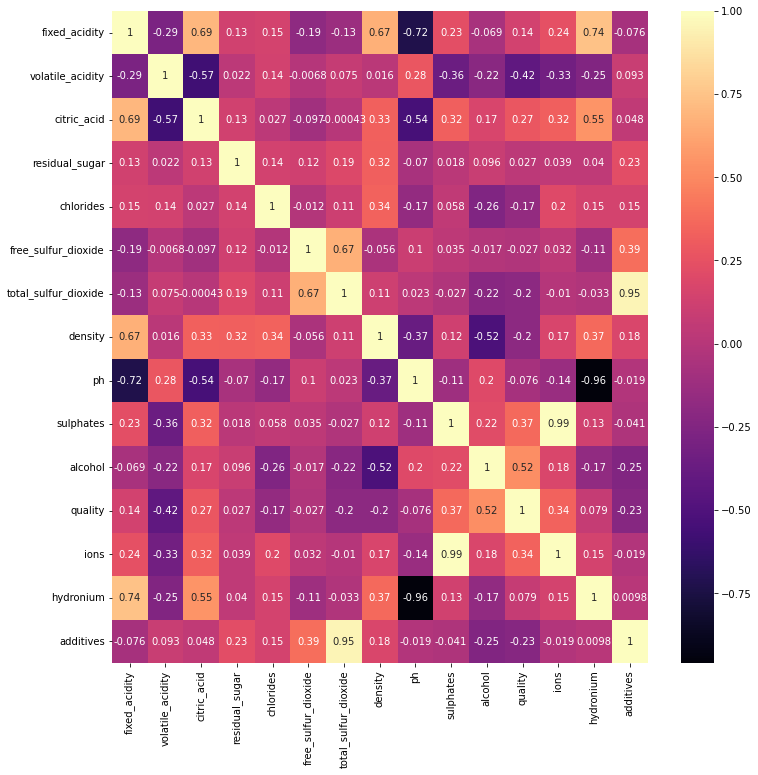

In [67]:
plt.figure(figsize=(12,12))
sns.heatmap(trainred.corr(), cmap='magma', center= 0, annot=True)

## Key Takeaways / Summary of Red Wine Statistical Tests
#### Hypothesis Testing / Tested Hypotheses


#### Reject null statment: No correlation between alcohol and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.5058275857220219
    p: 2.5965006260626788e-59
        
#### Reject null statment: No correlation between sulphates and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2383682513029749
    p: 4.989209803072576e-13
        
#### Reject null statment: No correlation between citric_acid and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2383682513029749
    p: 4.989209803072576e-13

#### Reject null statment: No correlation between fixed_acidity and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.11803244569675303
    p: 0.0004023084389424685

#### Fail to reject the null hypothesis, No correlation between pH and quality.

    Correlation Coefficient: -0.038358069617661736
    p: 0.2516465236893746
    
#### Reject null statment: No correlation between density and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.174558404107124
    p: 1.4779499074184612e-07
    
#### Reject null statment: No correlation between chlorides and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.1460824605018894
    p: 1.1453779437218817e-05    
    
#### Reject null statment: No correlation between volatile_acidity and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.3584259210477414
    p: 1.603311510782249e-28    
    
#### Reject null statment: No correlation between additives and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.1540701707993149
    p: 1.9907442404911995e-05

<AxesSubplot:>

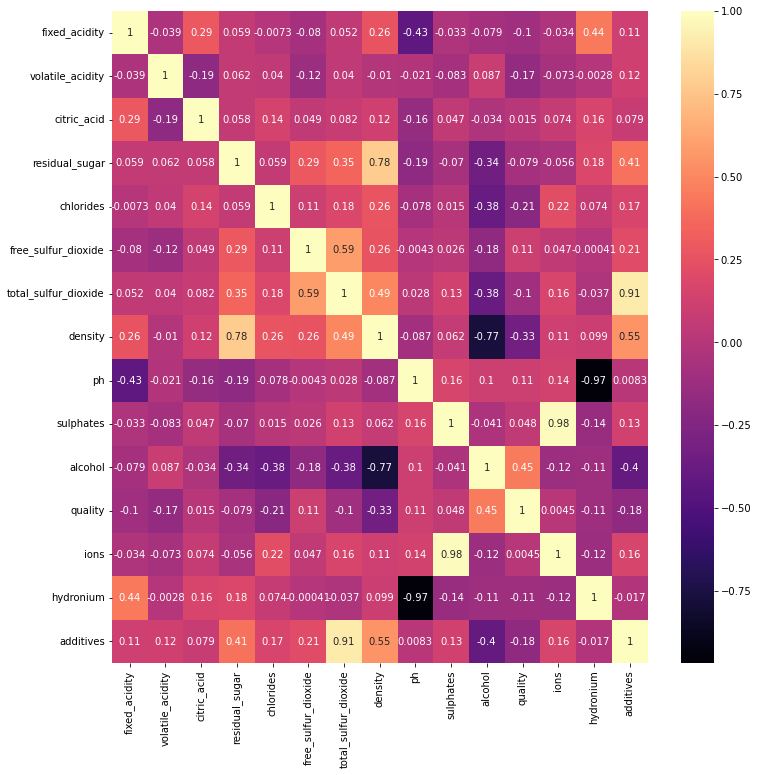

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(trainwhite.corr(), cmap='magma', center= 0, annot=True)

## Key Takeaways / Summary of White Wine Statistical Tests
#### Hypothesis Testing / Tested Hypotheses

### Univariate/Bivariate/Multivariate Analysis Red Wine Data Set
    - Boxplot relationships visualize feature impact on quality

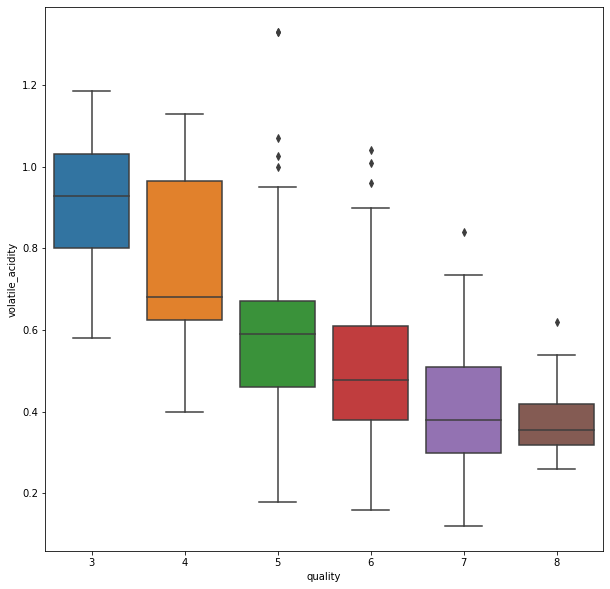

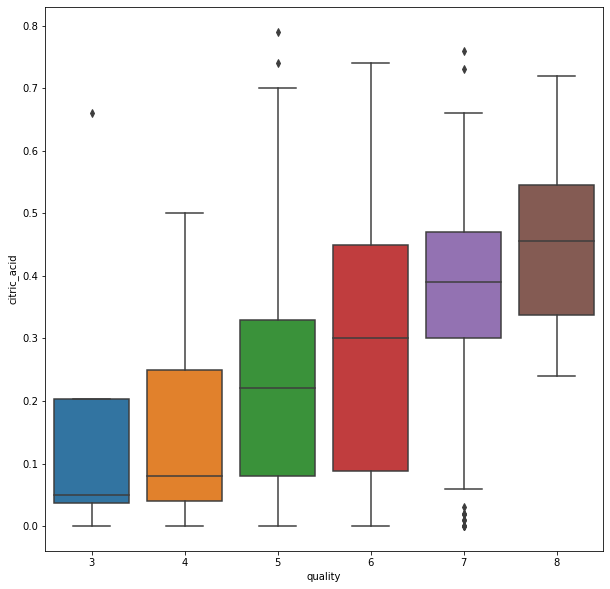

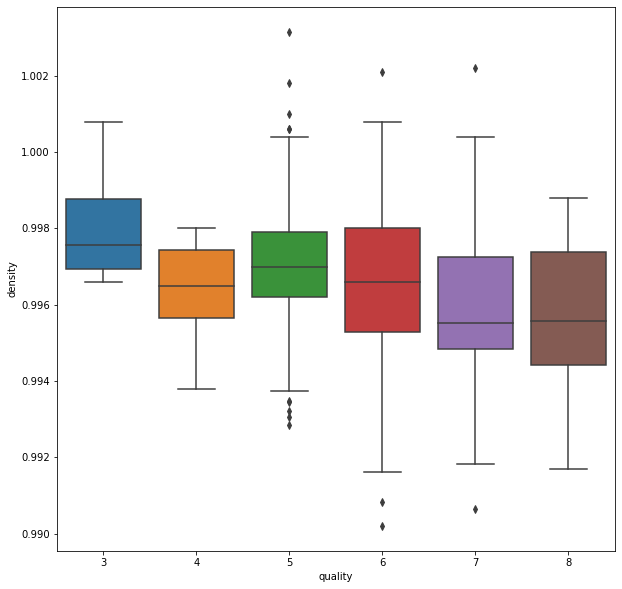

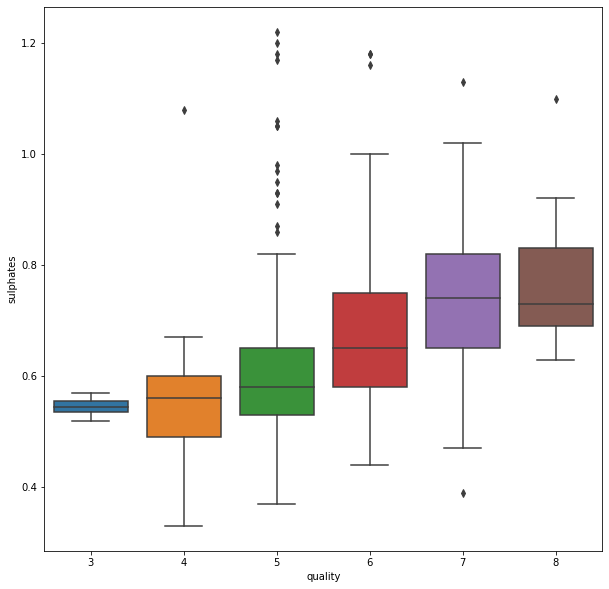

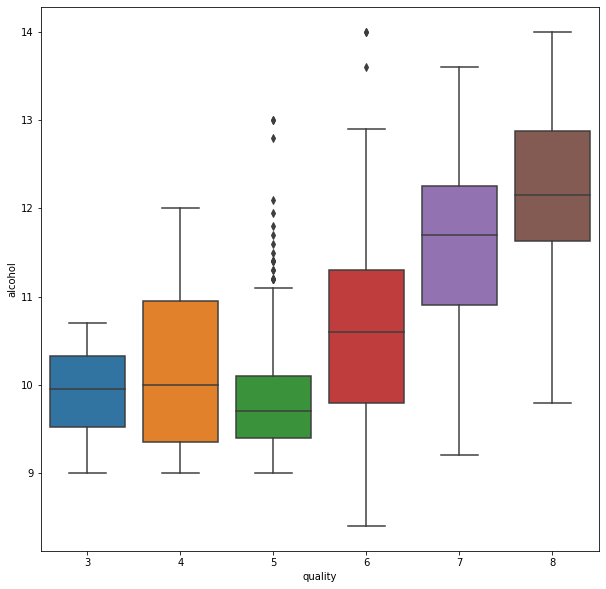

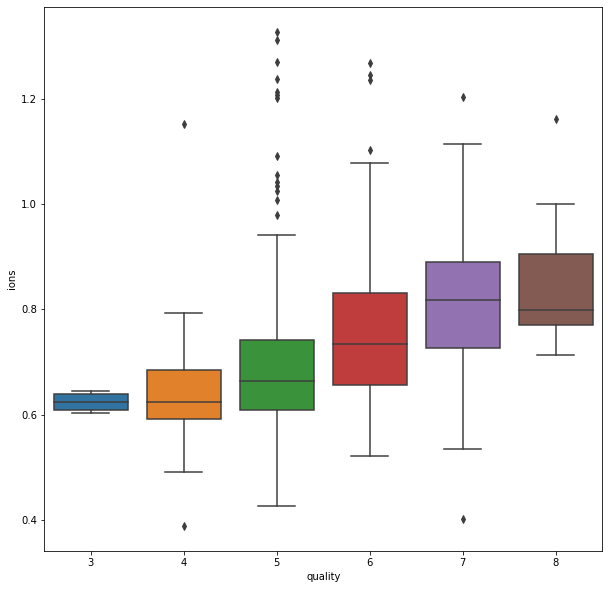

In [72]:
plt.figure(figsize=(10,10))
sns.boxplot(x=trainred.quality, y=trainred.volatile_acidity, data=trainred)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=trainred.quality, y=trainred.citric_acid, data=trainred)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=trainred.quality, y=trainred.density, data=trainred)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=trainred.quality, y=trainred.sulphates, data=trainred)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=trainred.quality, y=trainred.alcohol, data=trainred)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=trainred.quality, y=trainred.ions, data=trainred)
plt.show()

## Red Wine Boxplot takeaways:
1. volatile acidity vs quality, indicates that as score increases, volatile acidity decreases
2. citric acid vs quality score, indicates higher quality score with higher citric acid
3. sulphates vs quality score, indicates that low quality score has lower amount of sulphates
4. alcohol vs quality score, indicates low quality score has lower alcohol content



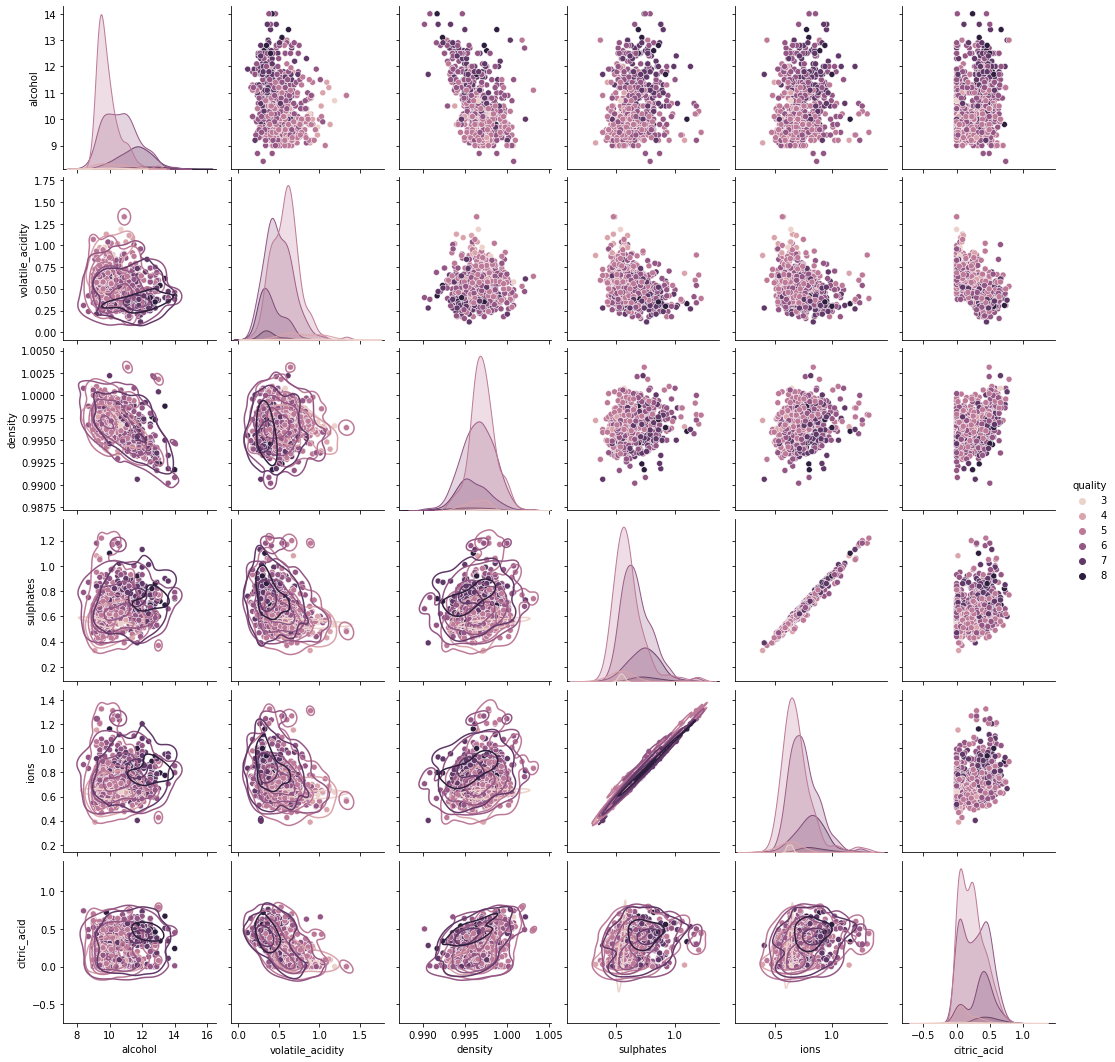

In [73]:
g = sns.pairplot(trainred, x_vars=['alcohol',
 'volatile_acidity',
 'density',
 'sulphates','ions','citric_acid'],
    y_vars=['alcohol',
 'volatile_acidity',
 'density',
 'sulphates','ions','citric_acid'], 
    hue="quality", diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

### Red Wine Pairplot takeaways:
#### Hued on the quality score, examines features that were identified during boxplot exploration that were impactful and differential with regards to quality
 ['alcohol', 'volatile_acidity', 'density', 'sulphates', 'ions', 'citric_acid']

<AxesSubplot:xlabel='alcohol', ylabel='volatile_acidity'>

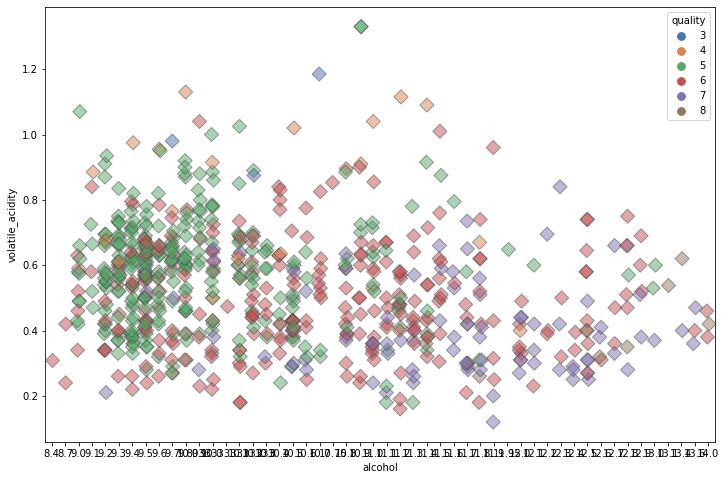

In [83]:
plt.figure(figsize=(12,8))
sns.stripplot(data=trainred, x="alcohol", y="volatile_acidity", hue="quality", palette="deep",s=10, marker="D", linewidth=1, alpha=.5)

### stripplot takeaways
1. high alcohol content and low volatile_acidity result in higher quality score

<AxesSubplot:xlabel='alcohol', ylabel='density'>

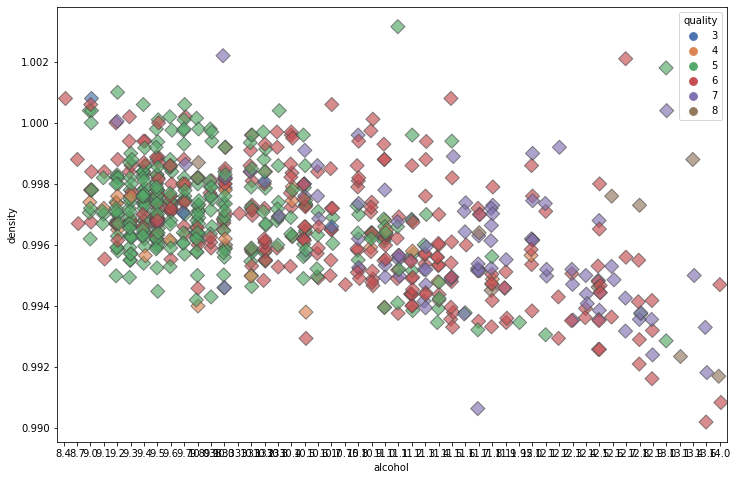

In [86]:
plt.figure(figsize=(12,8))
sns.stripplot(data=trainred, x="alcohol", y="density", hue="quality", palette="deep",s=10, marker="D", linewidth=1, alpha=.65)

### stripplot takeaways
1. low density, high alcohol result in higher quality score

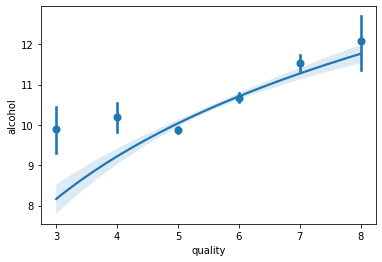

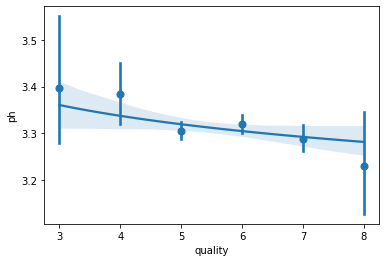

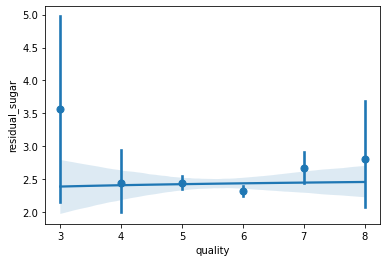

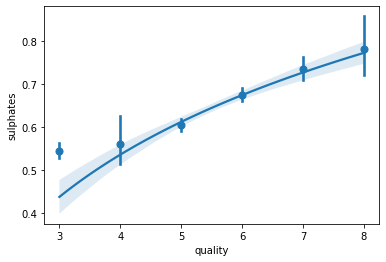

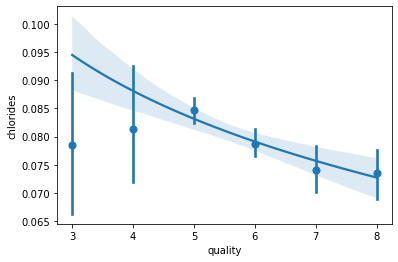

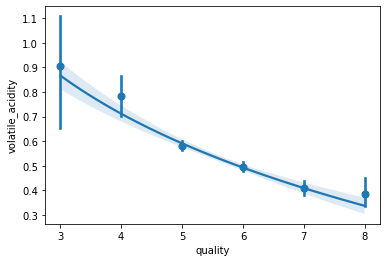

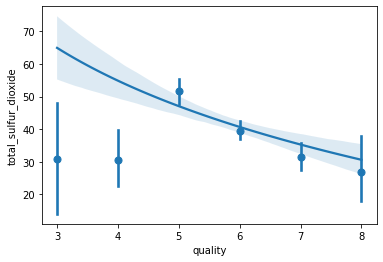

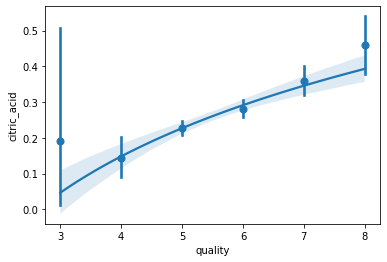

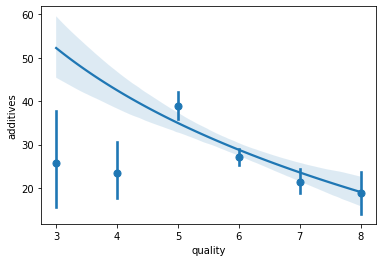

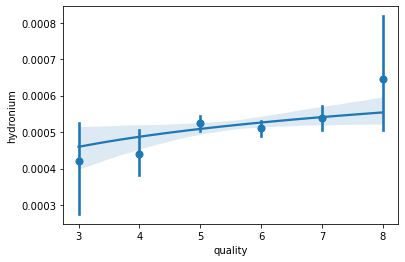

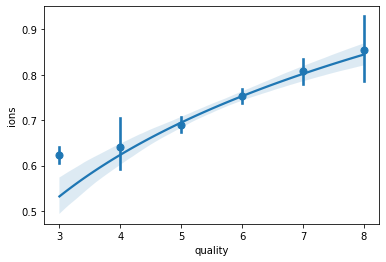

In [89]:
ax = sns.regplot(x="quality", y="alcohol", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="ph", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="residual_sugar", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="sulphates", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="chlorides", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="volatile_acidity", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="total_sulfur_dioxide", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="citric_acid", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="additives", data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y='hydronium', data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y='ions', data=trainred,
                 x_estimator=np.mean, logx=True)
plt.show()

### regplots fit with logarithmic line of best fit for each feature demonstrating trend across quality score

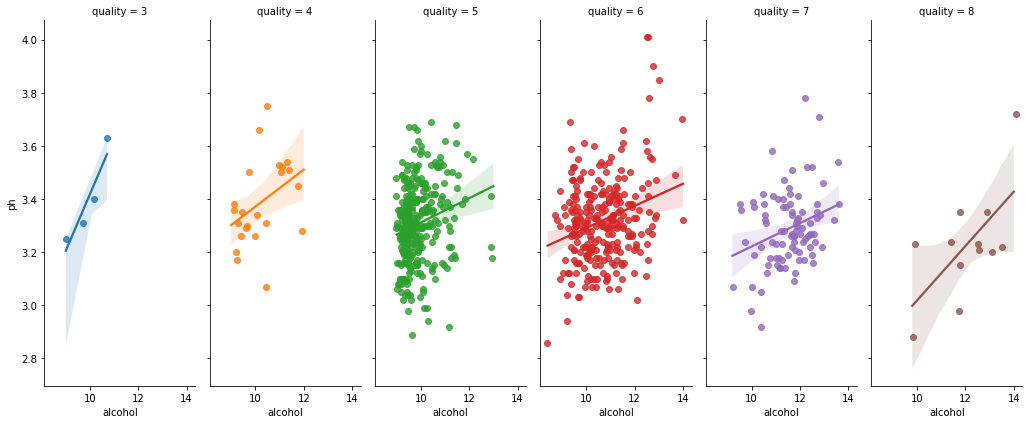

In [92]:
g = sns.lmplot(x="alcohol", y="ph", hue="quality", col="quality",
               data=trainred, height=6, aspect=.4, x_jitter=.1)

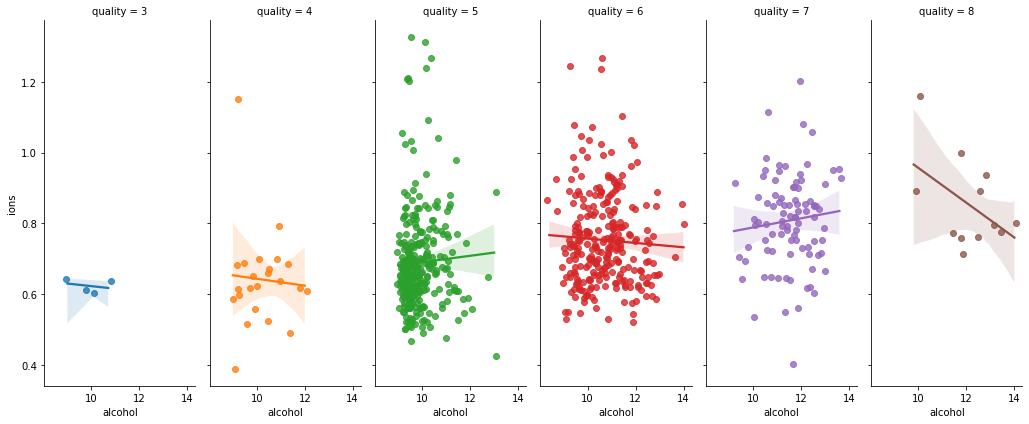

In [93]:
g = sns.lmplot(x="alcohol", y="ions", hue="quality", col="quality",
               data=trainred, height=6, aspect=.4, x_jitter=.1)

### lmplot takeaways:
1. higher ionic content and alcohol led to greater quality score

### Time to Scale the data
    -utlize helper function scale_reds in model.py

In [18]:
#dropping type column, remnant from combined 'both' dataset
X_trainred.drop(columns=['type'],inplace=True)
X_validatered.drop(columns=['type'],inplace=True)
X_testred.drop(columns=['type'],inplace=True)

In [19]:
#dropping type column, remnant from combined 'both' dataset
X_trainwhite.drop(columns=['type'],inplace=True)
X_validatewhite.drop(columns=['type'],inplace=True)
X_testwhite.drop(columns=['type'],inplace=True)

In [20]:
X_trainred.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,ions,hydronium,additives
662,7.2,0.570,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6,0.776,0.000437,20.376
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,0.749,0.000537,5.949
1418,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,0.537,0.000692,18.137
170,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1,0.388,0.000437,6.188
1366,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,0.594,0.000575,37.294


In [21]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_trainred)

trainred_mms = mms.transform(X_trainred)

In [22]:
#scaled back into df
X_trainred_scaled = pd.DataFrame(trainred_mms, columns=list(X_trainred.columns))

#### Scaling Data 
    - red
    - white

In [23]:
def scale_reds():
    
    #Assign the scaler to a variable, and fit/transform the training data
    mms1 = sklearn.preprocessing.MinMaxScaler()
    mms1.fit(X_trainred)
    trainred_mms = mms1.transform(X_trainred)
    #scaled back into df
    X_trainred_scaled = pd.DataFrame(trainred_mms, columns=list(X_trainred.columns))
    
    #Assign the scaler to a variable, and fit/transform the training data
    mms2 = sklearn.preprocessing.MinMaxScaler()
    mms2.fit(X_validatered)
    validatered_mms = mms2.transform(X_validatered)
    #scaled back into df
    X_validatered_scaled = pd.DataFrame(validatered_mms, columns=list(X_validatered.columns))
    
    #Assign the scaler to a variable, and fit/transform the training data
    mms3 = sklearn.preprocessing.MinMaxScaler()
    mms3.fit(X_testred)
    testred_mms = mms3.transform(X_testred)
    #scaled back into df
    X_testred_scaled = pd.DataFrame(testred_mms, columns=list(X_testred.columns))
    
    return X_trainred_scaled, X_validatered_scaled, X_testred_scaled

In [24]:
X_trainred_scaled, X_validatered_scaled, X_testred_scaled = scale_reds()

In [25]:
X_trainred_scaled.shape, X_validatered_scaled.shape, X_testred_scaled.shape

((711, 14), (305, 14), (255, 14))

In [26]:
X_trainred_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,ions,hydronium,additives
0,0.231481,0.371901,0.075949,0.059701,0.351648,0.119403,0.170732,0.540541,0.434783,0.415730,0.214286,0.413206,0.264132,0.139584
1,0.361111,0.161157,0.506329,0.149254,0.368132,0.029851,0.000000,0.379923,0.356522,0.382022,0.625000,0.384452,0.342498,0.007715
2,0.287037,0.338843,0.012658,0.059701,0.357143,0.029851,0.105691,0.370656,0.260870,0.146067,0.250000,0.158679,0.463184,0.119118
3,0.296296,0.632231,0.037975,0.089552,0.252747,0.044776,0.016260,0.540541,0.434783,0.000000,0.125000,0.000000,0.264132,0.009899
4,0.240741,0.512397,0.101266,0.074627,0.450549,0.134328,0.317073,0.429344,0.330435,0.191011,0.250000,0.219382,0.372442,0.294221


In [27]:
def scale_whites():
    
    #Assign the scaler to a variable, and fit/transform the training data
    mms1 = sklearn.preprocessing.MinMaxScaler()
    mms1.fit(X_trainwhite)
    trainwhite_mms = mms1.transform(X_trainwhite)
    #scaled back into df
    X_trainwhite_scaled = pd.DataFrame(trainwhite_mms, columns=list(X_trainwhite.columns))
    
    #Assign the scaler to a variable, and fit/transform the training data
    mms2 = sklearn.preprocessing.MinMaxScaler()
    mms2.fit(X_validatewhite)
    validatewhite_mms = mms2.transform(X_validatewhite)
    #scaled back into df
    X_validatewhite_scaled = pd.DataFrame(validatewhite_mms, columns=list(X_validatewhite.columns))
    
    #Assign the scaler to a variable, and fit/transform the training data
    mms3 = sklearn.preprocessing.MinMaxScaler()
    mms3.fit(X_testwhite)
    testwhite_mms = mms3.transform(X_testwhite)
    #scaled back into df
    X_testwhite_scaled = pd.DataFrame(testwhite_mms, columns=list(X_testwhite.columns))
    
    return X_trainwhite_scaled, X_validatewhite_scaled, X_testwhite_scaled

In [28]:
X_trainwhite_scaled, X_validatewhite_scaled, X_testwhite_scaled = scale_whites()

In [29]:
X_trainwhite_scaled.shape, X_validatewhite_scaled.shape, X_testwhite_scaled.shape

((2009, 14), (861, 14), (718, 14))

### Top 6 Features prior to introduction to Clusters for red wines

- f_feature
- rfe_featire

In [30]:
# from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 6 features
f_selector = SelectKBest(f_regression, k=6)

# find the top 8 X's correlated with y
f_selector.fit(X_trainred, y_trainred)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_trainred.iloc[:,feature_mask].columns.tolist()

In [31]:
f_feature

['volatile_acidity',
 'citric_acid',
 'sulphates',
 'alcohol',
 'ions',
 'additives']

In [32]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=6)

# fit the data using RFE
rfe.fit(X_trainred,y_trainred)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_trainred.iloc[:,feature_mask].columns.tolist()

In [33]:
rfe_feature

['volatile_acidity',
 'citric_acid',
 'chlorides',
 'density',
 'sulphates',
 'hydronium']

### Top 6 Features prior to introduction to clusters for white wines

- f_feature
- rfe_featire

In [34]:
# from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 6 features
f_selector = SelectKBest(f_regression, k=6)

# find the top 8 X's correlated with y
f_selector.fit(X_trainwhite, y_trainwhite)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_trainwhite.iloc[:,feature_mask].columns.tolist()

In [35]:
f_feature

['volatile_acidity',
 'chlorides',
 'density',
 'alcohol',
 'hydronium',
 'additives']

In [36]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=6)

# fit the data using RFE
rfe.fit(X_trainwhite,y_trainwhite)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_trainwhite.iloc[:,feature_mask].columns.tolist()

In [38]:
rfe_feature

['volatile_acidity', 'chlorides', 'density', 'ph', 'alcohol', 'hydronium']

## Clustering
- Flavor Profile
- Hierarchical clustering

### Hierarchical Clustering

In [39]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

In [40]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=4)
hierclusters = hiercluster.fit_predict(X_trainred_scaled) 
np.bincount(hierclusters) # count of data points in each cluster

array([253, 269,  87, 102], dtype=int64)

In [41]:
# Add cluster number to the original data

X_trainred_scaled['hier_cluster'] = hierclusters

X_trainred_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,ions,hydronium,additives,hier_cluster
0,0.231481,0.371901,0.075949,0.059701,0.351648,0.119403,0.170732,0.540541,0.434783,0.415730,0.214286,0.413206,0.264132,0.139584,1
1,0.361111,0.161157,0.506329,0.149254,0.368132,0.029851,0.000000,0.379923,0.356522,0.382022,0.625000,0.384452,0.342498,0.007715,0
2,0.287037,0.338843,0.012658,0.059701,0.357143,0.029851,0.105691,0.370656,0.260870,0.146067,0.250000,0.158679,0.463184,0.119118,1
3,0.296296,0.632231,0.037975,0.089552,0.252747,0.044776,0.016260,0.540541,0.434783,0.000000,0.125000,0.000000,0.264132,0.009899,1
4,0.240741,0.512397,0.101266,0.074627,0.450549,0.134328,0.317073,0.429344,0.330435,0.191011,0.250000,0.219382,0.372442,0.294221,1


In [42]:
# Add cluster number to the original data
X_validatered_scaled['hier_cluster'] = hiercluster.fit_predict(X_validatered_scaled)
X_testred_scaled['hier_cluster'] = hiercluster.fit_predict(X_testred_scaled)

In [43]:
# Find the size of the clusters
X_trainred_scaled['hier_cluster'].value_counts()

1    269
0    253
3    102
2     87
Name: hier_cluster, dtype: int64

In [44]:
def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

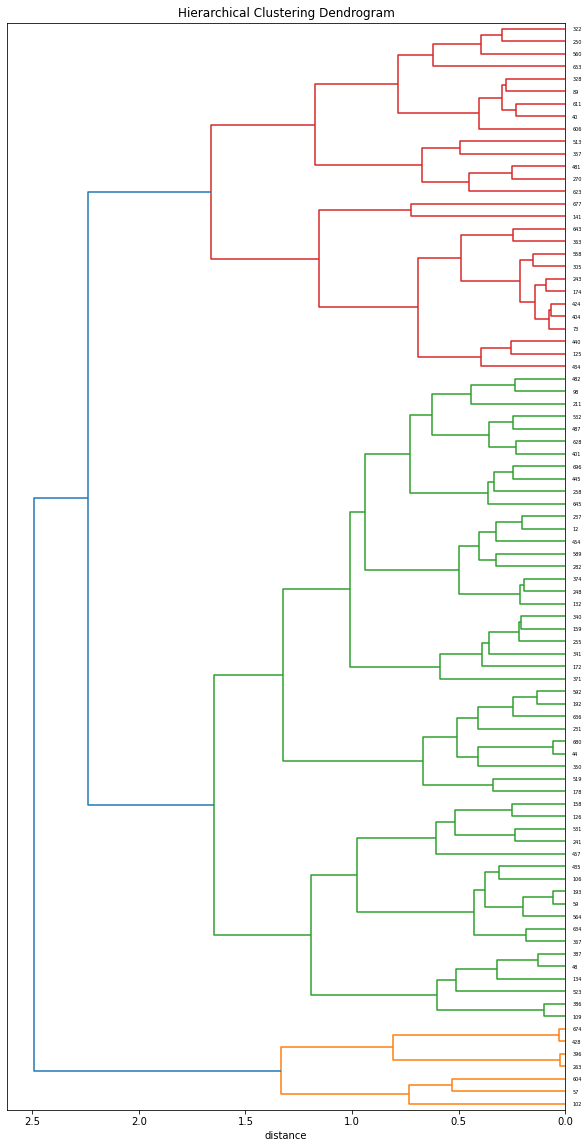

In [45]:
# Show a dendrogram, just for the smallest cluster

sample = X_trainred_scaled[X_trainred_scaled.hier_cluster==2]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,20))

In [46]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_trainred_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_trainred_scaled)

In [47]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

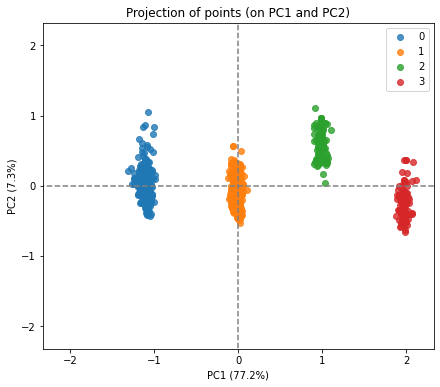

In [48]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = hierclusters, alpha = 0.8)

In [49]:
#changing data type to object, including all validate and test sets
X_trainred_scaled['hier_cluster']= X_trainred_scaled['hier_cluster'].astype('string')
X_validatered_scaled['hier_cluster'] = X_validatered_scaled['hier_cluster' ].astype('string')
X_testred_scaled['hier_cluster'] = X_testred_scaled['hier_cluster'].astype('string')

In [50]:
#dummy encode clusters, set column names
hiercluster_df1= pd.get_dummies(X_trainred_scaled.hier_cluster)
hiercluster_df1.columns = ['hierclusterone', 'hierclustertwo', 'hierclusterthree','hierclusterfour']
X_trainred_scaled = pd.concat([X_trainred_scaled, hiercluster_df1],axis=1) 

In [51]:
#dummy encode clusters, set column names
hiercluster_df2= pd.get_dummies(X_validatered_scaled.hier_cluster)
hiercluster_df2.columns = ['hierclusterone', 'hierclustertwo', 'hierclusterthree','hierclusterfour']
X_validatered_scaled = pd.concat([X_validatered_scaled, hiercluster_df2],axis=1) 

In [52]:
#dummy encode clusters, set column names
hiercluster_df3= pd.get_dummies(X_testred_scaled.hier_cluster)
hiercluster_df3.columns = ['hierclusterone', 'hierclustertwo', 'hierclusterthree','hierclusterfour']
X_testred_scaled = pd.concat([X_testred_scaled, hiercluster_df3],axis=1)

In [170]:
# def encode_hiercluster_red():
    
#     ''' transform the hierarchical cluster into a string type, then dummie variable in prep for the model
#     does so on all the modeling sets xtrainred scaled, xvalidatered scaled xtestred scaled'''
    
#     #changing data type to object, including all validate and test sets
#     X_trainred_scaled['hier_cluster']= X_trainred_scaled['hier_cluster'].astype('string')
#     X_validatered_scaled['hier_cluster'] = X_validatered_scaled['hier_cluster' ].astype('string')
#     X_testred_scaled['hier_cluster'] = X_testred_scaled['hier_cluster'].astype('string')
    
    
#     #dummy encode clusters, set column names
#     hiercluster_df1= pd.get_dummies(X_trainred_scaled.hier_cluster)
#     hiercluster_df1.columns = ['hierclusterone', 'hierclustertwo', 'hierclusterthree','hierclusterfour']
#     X_trainred_scaled = pd.concat([X_trainred_scaled, hiercluster_df1],axis=1) 
    
#     #dummy encode clusters, set column names
#     hiercluster_df2= pd.get_dummies(X_validatered_scaled.hier_cluster)
#     hiercluster_df2.columns = ['hierclusterone', 'hierclustertwo', 'hierclusterthree','hierclusterfour']
#     X_validatered_scaled = pd.concat([X_validatered_scaled, hiercluster_df2],axis=1) 
    
#     #dummy encode clusters, set column names
#     hiercluster_df3= pd.get_dummies(X_testred_scaled.hier_cluster)
#     hiercluster_df3.columns = ['hierclusterone', 'hierclustertwo', 'hierclusterthree','hierclusterfour']
#     X_testred_scaled = pd.concat([X_testred_scaled, hiercluster_df3],axis=1)
    
#     return X_trainred_scaled, X_validatered_scaled, X_testred_scaled

In [53]:
# X_trainred_scaled, X_validatered_scaled, X_testred_scaled = encode_hiercluster_red()

In [53]:
X_trainred_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,ions,hydronium,additives,hier_cluster,hierclusterone,hierclustertwo,hierclusterthree,hierclusterfour
0,0.231481,0.371901,0.075949,0.059701,0.351648,0.119403,0.170732,0.540541,0.434783,0.415730,0.214286,0.413206,0.264132,0.139584,1,0,1,0,0
1,0.361111,0.161157,0.506329,0.149254,0.368132,0.029851,0.000000,0.379923,0.356522,0.382022,0.625000,0.384452,0.342498,0.007715,0,1,0,0,0
2,0.287037,0.338843,0.012658,0.059701,0.357143,0.029851,0.105691,0.370656,0.260870,0.146067,0.250000,0.158679,0.463184,0.119118,1,0,1,0,0
3,0.296296,0.632231,0.037975,0.089552,0.252747,0.044776,0.016260,0.540541,0.434783,0.000000,0.125000,0.000000,0.264132,0.009899,1,0,1,0,0
4,0.240741,0.512397,0.101266,0.074627,0.450549,0.134328,0.317073,0.429344,0.330435,0.191011,0.250000,0.219382,0.372442,0.294221,1,0,1,0,0


In [54]:
X_trainwhite_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,ions,hydronium,additives
0,0.320388,0.509804,0.20,0.422727,0.264069,0.175926,0.863874,0.775019,0.295238,0.484848,0.177419,0.534682,0.439856,0.820723
1,0.349515,0.088235,0.34,0.036364,0.112554,0.101852,0.486911,0.363848,0.314286,0.787879,0.483871,0.773121,0.415655,0.445339
2,0.339806,0.176471,0.31,0.081818,0.147186,0.518519,0.884817,0.542281,0.666667,0.696970,0.419355,0.697977,0.121203,0.611134
3,0.320388,0.156863,0.29,0.072727,0.121212,0.324074,0.486911,0.379364,0.523810,0.636364,0.483871,0.631503,0.211569,0.324433
4,0.271845,0.186275,0.69,0.027273,0.722944,0.314815,0.507853,0.447634,0.228571,0.318182,0.193548,0.528902,0.533899,0.344823


In [55]:
#drop unused hier cluster column as they are now dummy encoded
X_trainred_scaled.drop(columns=['hier_cluster'], inplace=True)
X_validatered_scaled.drop(columns=['hier_cluster'], inplace=True)
X_testred_scaled.drop(columns=['hier_cluster'], inplace=True)

In [56]:
from model import FlavorProfile

In [57]:
#bringing in the flavor profile cluster
flavor = FlavorProfile()
flavor.fit(X_trainred_scaled)

X_trainred_scaled['flavor_profile'] = flavor.predict(X_trainred_scaled)
X_validatered_scaled['flavor_profile'] = flavor.predict(X_validatered_scaled)
X_testred_scaled['flavor_profile'] = flavor.predict(X_testred_scaled)


In [58]:
X_trainred_scaled['flavor_profile'].value_counts()

1    247
3    232
2    192
0     40
Name: flavor_profile, dtype: int64

In [59]:
    #changing data type to object, including all validate and test sets
X_trainred_scaled['flavor_profile']= X_trainred_scaled['flavor_profile'].astype('string')
X_validatered_scaled['flavor_profile'] = X_validatered_scaled['flavor_profile' ].astype('string')
X_testred_scaled['flavor_profile'] = X_testred_scaled['flavor_profile'].astype('string')

In [60]:
    #dummy encode clusters, set column names
flavor_profile_df1= pd.get_dummies(X_trainred_scaled.flavor_profile)
flavor_profile_df1.columns = ['flavor_one', 'flavor_two', 'flavor_three','flavor_four']
X_trainred_scaled = pd.concat([X_trainred_scaled, flavor_profile_df1],axis=1) 

In [61]:
    #dummy encode clusters, set column names
flavor_profile_df2= pd.get_dummies(X_validatered_scaled.flavor_profile)
flavor_profile_df2.columns = ['flavor_one', 'flavor_two', 'flavor_three','flavor_four']
X_validatered_scaled = pd.concat([X_validatered_scaled, flavor_profile_df2],axis=1) 

In [62]:
    #dummy encode clusters, set column names
flavor_profile_df3= pd.get_dummies(X_testred_scaled.flavor_profile)
flavor_profile_df3.columns = ['flavor_one', 'flavor_two', 'flavor_three','flavor_four']
X_testred_scaled = pd.concat([X_testred_scaled, flavor_profile_df3],axis=1) 

In [63]:
#drop unused hier cluster column as they are now dummy encoded
X_trainred_scaled.drop(columns=['flavor_profile'], inplace=True)
X_validatered_scaled.drop(columns=['flavor_profile'], inplace=True)
X_testred_scaled.drop(columns=['flavor_profile'], inplace=True)

In [64]:
X_trainred_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,hydronium,additives,hierclusterone,hierclustertwo,hierclusterthree,hierclusterfour,flavor_one,flavor_two,flavor_three,flavor_four
0,0.231481,0.371901,0.075949,0.059701,0.351648,0.119403,0.170732,0.540541,0.434783,0.415730,...,0.264132,0.139584,0,1,0,0,0,1,0,0
1,0.361111,0.161157,0.506329,0.149254,0.368132,0.029851,0.000000,0.379923,0.356522,0.382022,...,0.342498,0.007715,1,0,0,0,0,0,1,0
2,0.287037,0.338843,0.012658,0.059701,0.357143,0.029851,0.105691,0.370656,0.260870,0.146067,...,0.463184,0.119118,0,1,0,0,0,1,0,0
3,0.296296,0.632231,0.037975,0.089552,0.252747,0.044776,0.016260,0.540541,0.434783,0.000000,...,0.264132,0.009899,0,1,0,0,0,0,0,1
4,0.240741,0.512397,0.101266,0.074627,0.450549,0.134328,0.317073,0.429344,0.330435,0.191011,...,0.372442,0.294221,0,1,0,0,0,0,0,1


In [65]:
# from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 6 features
f_selector = SelectKBest(f_regression, k=6)

# find the top 8 X's correlated with y
f_selector.fit(X_trainred, y_trainred)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_trainred.iloc[:,feature_mask].columns.tolist()

In [66]:
f_feature

['volatile_acidity',
 'citric_acid',
 'sulphates',
 'alcohol',
 'ions',
 'additives']

In [67]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=6)

# fit the data using RFE
rfe.fit(X_trainred,y_trainred)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_trainred.iloc[:,feature_mask].columns.tolist()

In [68]:
rfe_feature

['volatile_acidity',
 'citric_acid',
 'chlorides',
 'density',
 'sulphates',
 'hydronium']

In [69]:
y_trainred.head()

,quality
662,6
915,6
1418,5
170,4
1366,5


In [70]:
X_trainred_scaled.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'ions',
 'hydronium',
 'additives',
 'hierclusterone',
 'hierclustertwo',
 'hierclusterthree',
 'hierclusterfour',
 'flavor_one',
 'flavor_two',
 'flavor_three',
 'flavor_four']

In [71]:
#drop unused features to enhance model perdormance
X_trainred_scaled.drop(columns=['fixed_acidity','residual_sugar','chlorides','free_sulfur_dioxide',
 'total_sulfur_dioxide','ph','hierclusterone','hierclustertwo','hierclusterthree','hierclusterfour',
 'flavor_one','flavor_two','flavor_three', 'flavor_four','sulphates'], inplace=True)
X_validatered_scaled.drop(columns=['fixed_acidity','residual_sugar','chlorides','free_sulfur_dioxide',
 'total_sulfur_dioxide','ph','hierclusterone','hierclustertwo','hierclusterthree','hierclusterfour',
 'flavor_one','flavor_two','flavor_three', 'flavor_four','sulphates'], inplace=True)
X_testred_scaled.drop(columns=['fixed_acidity','residual_sugar','chlorides','free_sulfur_dioxide',
 'total_sulfur_dioxide','ph','hierclusterone','hierclustertwo','hierclusterthree','hierclusterfour',
 'flavor_one','flavor_two','flavor_three', 'flavor_four','sulphates'], inplace=True)

In [262]:
# X_trainred_scaled.drop(columns=['sulphates'], inplace=True)
# X_validatered_scaled.drop(columns=['sulphates'], inplace=True)
# X_testred_scaled.drop(columns=['sulphates'], inplace=True)

In [75]:
#set of features to be used in modeling
X_trainred_scaled.columns.tolist()

['volatile_acidity',
 'citric_acid',
 'density',
 'alcohol',
 'ions',
 'hydronium',
 'additives']

In [73]:
#drop unused columns for white wine set
X_trainwhite_scaled.drop(columns=['fixed_acidity','residual_sugar','chlorides',
 'free_sulfur_dioxide','total_sulfur_dioxide',
 'ph','sulphates'], inplace=True)
X_validatewhite_scaled.drop(columns=['fixed_acidity','residual_sugar','chlorides',
 'free_sulfur_dioxide','total_sulfur_dioxide',
 'ph','sulphates'], inplace=True)
X_testwhite_scaled.drop(columns=['fixed_acidity','residual_sugar','chlorides',
 'free_sulfur_dioxide','total_sulfur_dioxide',
 'ph','sulphates'], inplace=True)

In [76]:
#set of features to be used in modeling
X_trainwhite_scaled.columns.tolist()

['volatile_acidity',
 'citric_acid',
 'density',
 'alcohol',
 'ions',
 'hydronium',
 'additives']

### Modeling Red
    -split, scaled, features added, ready to model

In [77]:
y_trainred.shape, y_validatered.shape, y_testred.shape

((711, 1), (305, 1), (255, 1))

In [78]:
y_trainred.shape, y_validatered.shape, y_testred.shape

((711, 1), (305, 1), (255, 1))

### Establish baseline

In [79]:
# 1. compute pred_median
quality_baseline_median = y_trainred['quality'].median()
y_trainred['quality_baseline_median'] = quality_baseline_median
y_validatered['quality_baseline_median'] = quality_baseline_median
y_testred['quality_baseline_median'] = quality_baseline_median

# 2. compute pred_mean
quality_baseline_mean = y_trainred['quality'].mean()
y_trainred['quality_baseline_mean'] = quality_baseline_mean
y_validatered['quality_baseline_mean'] = quality_baseline_mean
y_testred['quality_baseline_mean'] = quality_baseline_mean
#check to see which is better
y_trainred.head()

,quality,quality_baseline_median,quality_baseline_mean
662,6,6.0,5.64557
915,6,6.0,5.64557
1418,5,6.0,5.64557
170,4,6.0,5.64557
1366,5,6.0,5.64557


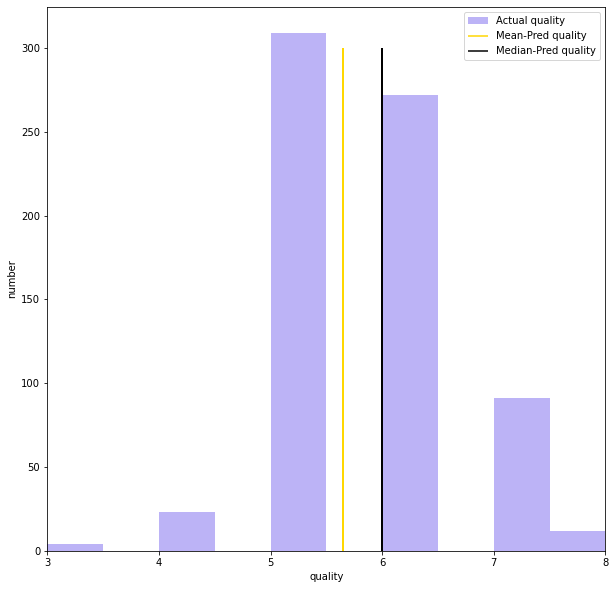

In [80]:
# plot to visualize actual vs predicted.
#median value performs better
plt.figure(figsize=(10,10))
plt.hist(y_trainred.quality, color='mediumslateblue', alpha=.5, label="Actual quality")
plt.vlines(y_trainred.quality_baseline_mean, 0, 300, color='gold', alpha=1, label="Mean-Pred quality")
plt.vlines(y_trainred.quality_baseline_median, 0,300, color='black', alpha=1, label="Median-Pred quality")
plt.xlim(3,8)
plt.xlabel("quality")
plt.ylabel("number")
plt.legend()
plt.show()

### Mean predicted quality looks like a good baseline

In [236]:
# 3. RMSE of hv_pred_mean
rmse_train = mean_squared_error(y_trainred.quality, y_trainred.quality_baseline_mean) ** (0.5)
rmse_validate = mean_squared_error(y_validatered.quality, y_validatered.quality_baseline_mean) ** (0.5)

print(f"""
      BASELINE:
      
      RMSE using Mean
      Train/In-Sample: {round(rmse_train, 3)}
      Validate/Out-of-Sample: {round(rmse_validate, 3)}
        """)


      BASELINE:
      
      RMSE using Mean
      Train/In-Sample: 0.827
      Validate/Out-of-Sample: 0.844
        


### Train / Validate
## Modeling: LinearRegression (OLS

In [237]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_trainred_scaled, y_trainred.quality)

# predict train
y_trainred['quality_pred_lm'] = lm.predict(X_trainred_scaled)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_trainred.quality, y_trainred.quality_pred_lm)**(0.5)

# predict validate
y_validatered['quality_pred_lm'] = lm.predict(X_validatered_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validatered.quality, y_validatered.quality_pred_lm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Mean
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: {round(rmse_train_lm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
""")


              BASELINE:
              
              RMSE using Mean
              Train/In-Sample: 0.83
              Validate/Out-of-Sample: 0.84

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: 0.63
    Validation/Out-of-Sample: 0.71



#### Modeling Lasso Lars

In [238]:
# create the model object

lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_trainred_scaled, y_trainred.quality)

# predict train
y_trainred['quality_pred_lars'] = lars.predict(X_trainred_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_trainred.quality, y_trainred.quality_pred_lars)**(0.5)

# predict validate
y_validatered['quality_pred_lars'] = lars.predict(X_validatered_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validatered.quality, y_validatered.quality_pred_lars)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Mean
              Train/In-Sample: {round(rmse_train, 4)}
              Validate/Out-of-Sample: {round(rmse_validate, 4)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 4)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 4)}

    RMSE for LassoLars
    
    Training/In-Sample: {round(rmse_train_lars, 4)}
    Validation/Out-of-Sample: {round(rmse_validate_lars, 4)}
""")


              BASELINE:
              
              RMSE using Mean
              Train/In-Sample: 0.8273
              Validate/Out-of-Sample: 0.8441
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 0.6326
                Validation/Out-of-Sample: 0.7125

    RMSE for LassoLars
    
    Training/In-Sample: 0.8273
    Validation/Out-of-Sample: 0.8441



### Modeling: TweedieRegressor (GLM)


In [239]:
# create the model object
glm = TweedieRegressor(power=-5, alpha=100)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_trainred_scaled, y_trainred.quality)

# predict train
y_trainred['quality_pred_glm'] = glm.predict(X_trainred_scaled)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_trainred.quality, y_trainred.quality_pred_glm)**(0.5)

# predict validate
y_validatered['quality_pred_glm'] = glm.predict(X_validatered_scaled)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validatered.quality, y_validatered.quality_pred_glm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Mean
              Train/In-Sample: {round(rmse_train, 3)}
              Validate/Out-of-Sample: {round(rmse_validate, 3)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 3)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 3)}
    
    RMSE for TweedieRegressor (GLM)
    power=0, alpha=0
    
    Training/In-Sample: {round(rmse_train_glm, 3)}
    Validation/Out-of-Sample: {round(rmse_validate_glm, 3)}
""")


              BASELINE:
              
              RMSE using Mean
              Train/In-Sample: 0.827
              Validate/Out-of-Sample: 0.844
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 0.633
                Validation/Out-of-Sample: 0.713

                RMSE for LassoLars
                
                Training/In-Sample: 0.827
                Validation/Out-of-Sample: 0.844
    
    RMSE for TweedieRegressor (GLM)
    power=0, alpha=0
    
    Training/In-Sample: 0.649
    Validation/Out-of-Sample: 0.72



### Modeling: PolynomialFeatures


In [240]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_trainred_scaled_degree2 = pf.fit_transform(X_trainred_scaled)

# transform X_validate_scaled & X_test_scaled
X_validatered_scaled_degree2 = pf.transform(X_validatered_scaled)
X_testred_scaled_degree2 = pf.transform(X_testred_scaled)

In [241]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_trainred_scaled_degree2, y_trainred.quality)

# predict train
y_trainred['quality_pred_lm2'] = lm2.predict(X_trainred_scaled_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_trainred.quality, y_trainred.quality_pred_lm2)**(0.5)

# predict validate
y_validatered['quality_pred_lm2'] = lm2.predict(X_validatered_scaled_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validatered.quality, y_validatered.quality_pred_lm2)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Mean
              Train/In-Sample: {round(rmse_train, 3)}
              Validate/Out-of-Sample: {round(rmse_validate, 3)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 3)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 3)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 3)}
                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: {round(rmse_train_lm2, 3)}
    Validation/Out-of-Sample: {round(rmse_validate_lm2, 3)}
""")


              BASELINE:
              
              RMSE using Mean
              Train/In-Sample: 0.827
              Validate/Out-of-Sample: 0.844
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 0.633
                Validation/Out-of-Sample: 0.713

                RMSE for LassoLars
                
                Training/In-Sample: 0.827
                Validation/Out-of-Sample: 0.844
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 0.649
                Validation/Out-of-Sample: 0.72
                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: 0.607
    Validation/Out-of-Sample: 0.684



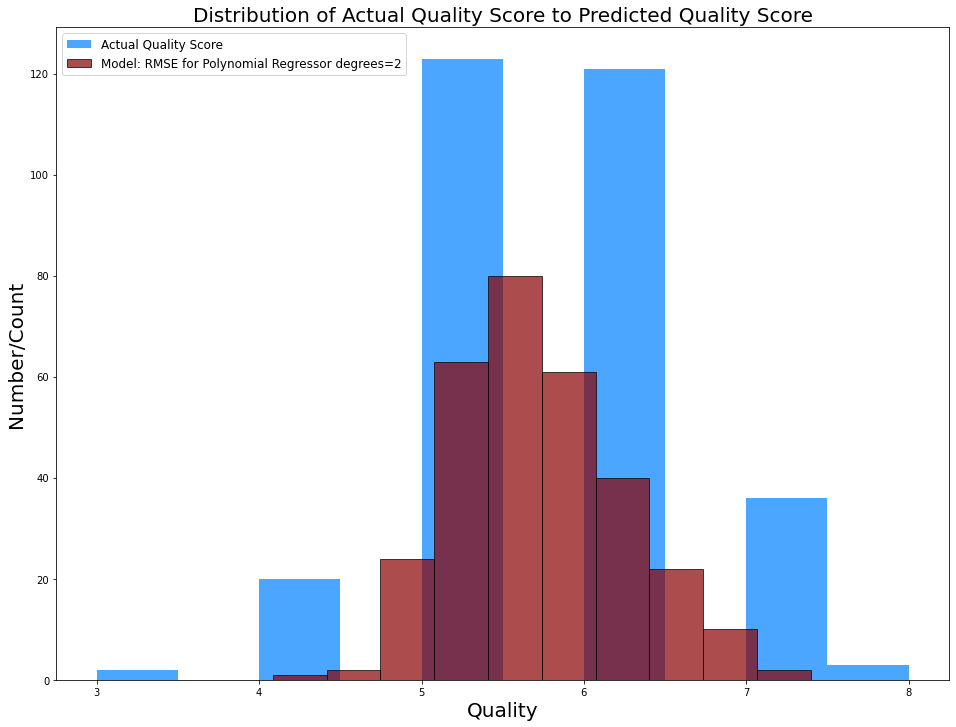

In [276]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,12))
plt.hist(y_validatered.quality, color='dodgerblue', alpha=.8, bins=10, label="Actual Quality Score")
plt.hist(y_validatered.quality_pred_lm2, color='darkred', alpha=.7, bins=10, label="Model: RMSE for Polynomial Regressor degrees=2", ec='black')
# plt.hist(y_validatered.quality_pred_lars, color='m', alpha=.2, bins=20,label="Model: RMSE for LassoLars Regressor ")
# plt.hist(y_validatered.quality_pred_lm, color='gold', alpha=.2, bins=10,label="Model: LinearRegression")
# plt.hist(y_validatered.quality_pred_glm, color='red', alpha=.5, bins=10, label="Model: RMSE for Tweedie Regressor")

# plt.xlim(-1, 1)
plt.xlabel("Quality",fontsize= 20)
plt.ylabel("Number/Count",fontsize= 20)
plt.title("Distribution of Actual Quality Score to Predicted Quality Score",fontsize= 20)
plt.legend(prop={'size': 12})
plt.show()

### Looks like the best model was the polynomial regressor
    BASELINE RMSE using Mean:
              Train/In-Sample: 0.827
              Validate/Out-of-Sample: 0.844

### RMSE Polynomial Regressor, degrees=2
    
    Training/In-Sample: 0.603
    Validation/Out-of-Sample: 0.685
    
    

In [243]:
#RMSE baseline test result
rmse_test_pred = mean_squared_error(y_testred.quality, y_testred.quality_baseline_mean) ** (0.5)
rmse_test_pred

0.8155729526362736

In [253]:
# predict
y_testred['quality_pred_lm2'] = lm2.predict(X_testred_scaled_degree2)


# evaluate: rmse
rmse_test = mean_squared_error(y_testred.quality, y_testred.quality_pred_lm2)**(0.5)




print(f"""
    
        
    BASELINE RMSE using Mean
    Test/Out-of-Sample: {round(rmse_test_pred, 3)}
    
    
    RMSE for Polynomial Regressor: 
    Test/Out-of-Sample Performance: {round(rmse_test, 3)}

""")



    
        
    BASELINE RMSE using Mean
    Test/Out-of-Sample: 0.816
    
    
    RMSE for Polynomial Regressor: 
    Test/Out-of-Sample Performance: 0.738




### Summary
-Following the evaluation and extensive modeling, I narrowed down the feature set to the following:
        -'volatile_acidity' 
        -'citric_acid' 
        -'density' 
        -'alcohol' 
        -'ions' 
        -'hydronium'
        -'additives'

The best performing model was the polynomial Regressor of the second degree. It performed best on both the training and validate sets, beating the baseline rmse on both the train and validate sets:
     
   ###  Training/In-Sample: 0.603 beating baseline RMSE of .827 by .220
   ### Validation/Out-of-Sample: 0.685 beating baseline RMSE of .844 by .159. 
   
## Finally, the model performed well with a RMSE on the test set of .738 beating the RMSE on the baseline of .816 by .078

-Next Steps: I would like to look at determining which features were the best features and adjusting accordingly. I found that the features I selected for final modeling yielded the greatest improvement in RMSE versus baseline, but potentially another combination of features/clusters could prove valueable. Feature enginneering proved worthwhile, ended up using three of the features in the final model. Potentially use the another cluster feature and a few others in order to improve model performance.
-Further analysis would allow for application of different clusters created and applied to the model.

# Modeling White Wine Set



In [93]:
y_trainwhite.shape, y_validatewhite.shape, y_testwhite.shape

((2009, 1), (861, 1), (718, 1))

### Establish baseline


In [94]:
# 1. compute pred_median
quality_baseline_median = y_trainwhite['quality'].median()
y_trainwhite['quality_baseline_median'] = quality_baseline_median
y_validatewhite['quality_baseline_median'] = quality_baseline_median
y_testwhite['quality_baseline_median'] = quality_baseline_median

# 2. compute pred_mean
quality_baseline_mean = y_trainwhite['quality'].mean()
y_trainwhite['quality_baseline_mean'] = quality_baseline_mean
y_validatewhite['quality_baseline_mean'] = quality_baseline_mean
y_testwhite['quality_baseline_mean'] = quality_baseline_mean
#check to see which is better
y_trainwhite.head()

,quality,quality_baseline_median,quality_baseline_mean
450,5,6.0,5.889
1039,5,6.0,5.889
2004,6,6.0,5.889
1837,7,6.0,5.889
4344,6,6.0,5.889


### Visualize the mean and median
    - choose the best value for the baseline, this case its the median pred quality

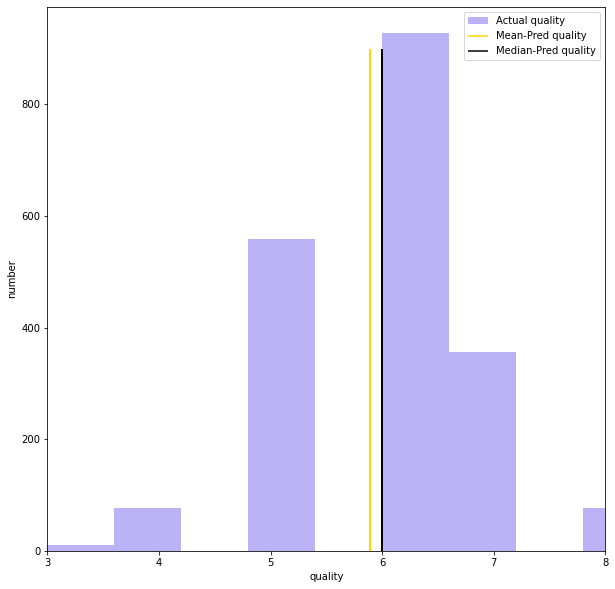

In [96]:
# plot to visualize actual vs predicted.
#median value performs better
plt.figure(figsize=(10,10))
plt.hist(y_trainwhite.quality, color='mediumslateblue', alpha=.5, label="Actual quality")
plt.vlines(y_trainwhite.quality_baseline_mean, 0, 900, color='gold', alpha=1, label="Mean-Pred quality")
plt.vlines(y_trainwhite.quality_baseline_median, 0,900, color='black', alpha=1, label="Median-Pred quality")
plt.xlim(3,8)
plt.xlabel("quality")
plt.ylabel("number")
plt.legend()
plt.show()

### Median pred baseline looks like the best choice

In [254]:
# 3. RMSE of hv_pred_median
rmse_train = mean_squared_error(y_trainwhite.quality, y_trainwhite.quality_baseline_median) ** (0.5)
rmse_validate = mean_squared_error(y_validatewhite.quality, y_validatewhite.quality_baseline_median) ** (0.5)

print(f"""
      BASELINE:
      
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 3)}
      Validate/Out-of-Sample: {round(rmse_validate, 3)}
        """)


      BASELINE:
      
      RMSE using Median
      Train/In-Sample: 0.904
      Validate/Out-of-Sample: 0.902
        


### Train/Validate Model

## Modeling: LinearRegression (OLS

In [304]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_trainwhite_scaled, y_trainwhite.quality)

# predict train
y_trainwhite['quality_pred_lm'] = lm.predict(X_trainwhite_scaled)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_trainwhite.quality, y_trainwhite.quality_pred_lm)**(0.5)

# predict validate
y_validatewhite['quality_pred_lm'] = lm.predict(X_validatewhite_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validatewhite.quality, y_validatewhite.quality_pred_lm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median:
              Train/In-Sample: {round(rmse_train, 3)}
              Validate/Out-of-Sample: {round(rmse_validate, 3)}

    RMSE for OLS using LinearRegression:
    
    Training/In-Sample: {round(rmse_train_lm, 3)}
    Validation/Out-of-Sample: {round(rmse_validate_lm, 3)}
""")


              BASELINE:
              
              RMSE using Median:
              Train/In-Sample: 0.904
              Validate/Out-of-Sample: 0.902

    RMSE for OLS using LinearRegression:
    
    Training/In-Sample: 0.774
    Validation/Out-of-Sample: 0.795



## Modeling: LassoLars

In [305]:
# create the model object

lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_trainwhite_scaled, y_trainwhite.quality)

# predict train
y_trainwhite['quality_pred_lars'] = lars.predict(X_trainwhite_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_trainwhite.quality, y_trainwhite.quality_pred_lars)**(0.5)

# predict validate
y_validatewhite['quality_pred_lars'] = lars.predict(X_validatewhite_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validatewhite.quality, y_validatewhite.quality_pred_lars)**(0.5)

print(f"""
                BASELINE:
              
                RMSE using Median
                Train/In-Sample: {round(rmse_train, 4)}
                Validate/Out-of-Sample: {round(rmse_validate, 4)}
              
                RMSE for OLS using LinearRegression:
                
                Training/In-Sample: {round(rmse_train_lm, 4)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 4)}

    RMSE for LassoLars:
    
    Training/In-Sample: {round(rmse_train_lars, 4)}
    Validation/Out-of-Sample: {round(rmse_validate_lars, 4)}
""")


                BASELINE:
              
                RMSE using Median
                Train/In-Sample: 0.9038
                Validate/Out-of-Sample: 0.9017
              
                RMSE for OLS using LinearRegression:
                
                Training/In-Sample: 0.7737
                Validation/Out-of-Sample: 0.7948

    RMSE for LassoLars:
    
    Training/In-Sample: 0.8969
    Validation/Out-of-Sample: 0.8979



## Modeling: Tweedie Regressor

In [306]:
# create the model object
glm = TweedieRegressor(power=-5, alpha=100)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_trainwhite_scaled, y_trainwhite.quality)

# predict train
y_trainwhite['quality_pred_glm'] = glm.predict(X_trainwhite_scaled)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_trainwhite.quality, y_trainwhite.quality_pred_glm)**(0.5)

# predict validate
y_validatewhite['quality_pred_glm'] = glm.predict(X_validatewhite_scaled)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validatewhite.quality, y_validatewhite.quality_pred_glm)**(0.5)

print(f"""
                BASELINE:
              
                RMSE using Median:
                Train/In-Sample: {round(rmse_train, 3)}
                Validate/Out-of-Sample: {round(rmse_validate, 3)}
              
                RMSE for OLS using LinearRegression:
                
                Training/In-Sample: {round(rmse_train_lm, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 3)}

                RMSE for LassoLars:
                
                Training/In-Sample: {round(rmse_train_lars, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 3)}
    
    RMSE for TweedieRegressor (GLM):
    power=-5, alpha=100
    
    Training/In-Sample: {round(rmse_train_glm, 3)}
    Validation/Out-of-Sample: {round(rmse_validate_glm, 3)}
""")


                BASELINE:
              
                RMSE using Median:
                Train/In-Sample: 0.904
                Validate/Out-of-Sample: 0.902
              
                RMSE for OLS using LinearRegression:
                
                Training/In-Sample: 0.774
                Validation/Out-of-Sample: 0.795

                RMSE for LassoLars:
                
                Training/In-Sample: 0.897
                Validation/Out-of-Sample: 0.898
    
    RMSE for TweedieRegressor (GLM):
    power=-5, alpha=100
    
    Training/In-Sample: 0.794
    Validation/Out-of-Sample: 0.772



## Modeling: Polynomial Features

In [307]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_trainwhite_scaled_degree2 = pf.fit_transform(X_trainwhite_scaled)

# transform X_validate_scaled & X_test_scaled
X_validatewhite_scaled_degree2 = pf.transform(X_validatewhite_scaled)
X_testwhite_scaled_degree2 = pf.transform(X_testwhite_scaled)

In [308]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_trainwhite_scaled_degree2, y_trainwhite.quality)

# predict train
y_trainwhite['quality_pred_lm2'] = lm2.predict(X_trainwhite_scaled_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_trainwhite.quality, y_trainwhite.quality_pred_lm2)**(0.5)

# predict validate
y_validatewhite['quality_pred_lm2'] = lm2.predict(X_validatewhite_scaled_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validatewhite.quality, y_validatewhite.quality_pred_lm2)**(0.5)

print(f"""
                BASELINE:
              
                RMSE using Median:
                Train/In-Sample: {round(rmse_train, 3)}
                Validate/Out-of-Sample: {round(rmse_validate, 3)}
              
                RMSE for OLS using LinearRegression:
                
                Training/In-Sample: {round(rmse_train_lm, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 3)}

                RMSE for LassoLars:
                
                Training/In-Sample: {round(rmse_train_lars, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 3)}
    
                RMSE for TweedieRegressor (GLM)
                power=-5, alpha=100
                
                Training/In-Sample: {round(rmse_train_glm, 3)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 3)}
                
    
    RMSE for Polynomial Regressor:
    degrees=3
    
    Training/In-Sample: {round(rmse_train_lm2, 3)}
    Validation/Out-of-Sample: {round(rmse_validate_lm2, 3)}
""")


                BASELINE:
              
                RMSE using Median:
                Train/In-Sample: 0.904
                Validate/Out-of-Sample: 0.902
              
                RMSE for OLS using LinearRegression:
                
                Training/In-Sample: 0.774
                Validation/Out-of-Sample: 0.795

                RMSE for LassoLars:
                
                Training/In-Sample: 0.897
                Validation/Out-of-Sample: 0.898
    
                RMSE for TweedieRegressor (GLM)
                power=-5, alpha=100
                
                Training/In-Sample: 0.794
                Validation/Out-of-Sample: 0.772
                
    
    RMSE for Polynomial Regressor:
    degrees=3
    
    Training/In-Sample: 0.726
    Validation/Out-of-Sample: 0.838



### RMSE Polynomial Regressor, degrees = 3

### White Wine Modeling Results - visualized

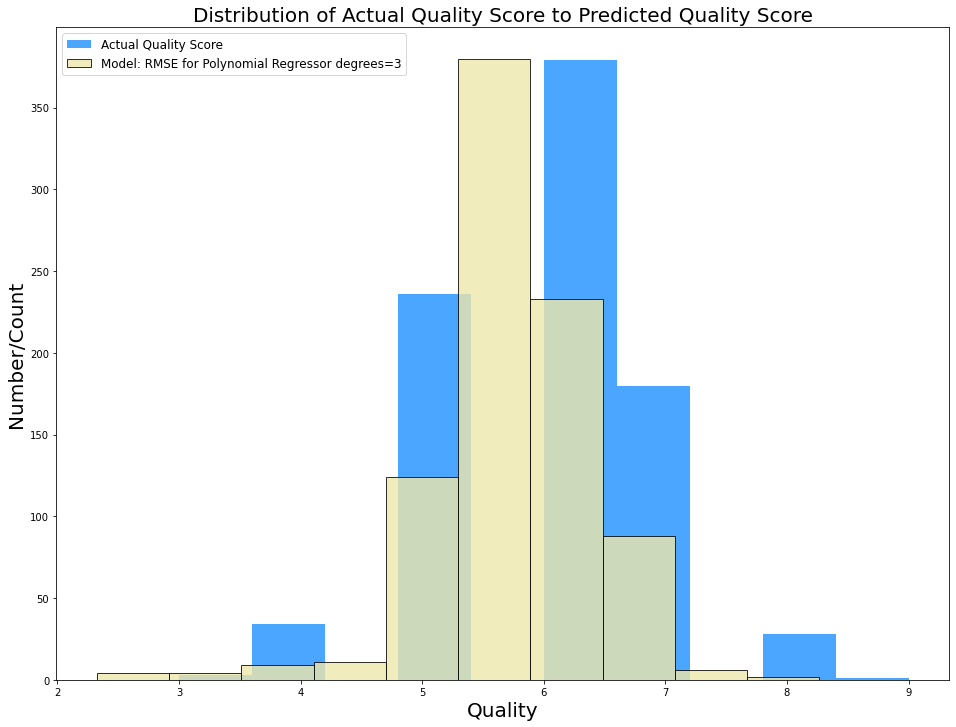

In [309]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,12))
plt.hist(y_validatewhite.quality, color='dodgerblue', alpha=.8, bins=10, label="Actual Quality Score")
plt.hist(y_validatewhite.quality_pred_lm2, color='palegoldenrod', alpha=.8, bins=10, label="Model: RMSE for Polynomial Regressor degrees=3", ec='black')


# plt.hist(y_validatewhite.quality_pred_lars, color='m', alpha=.2, bins=20,label="Model: RMSE for LassoLars Regressor ")
# plt.hist(y_validatewhite.quality_pred_lm, color='black', alpha=.2, bins=20,label="Model: LinearRegression")
# plt.hist(y_validatewhite.quality_pred_glm, color='red', alpha=.5, bins=20, label="Model: RMSE for Tweedie Regressor")

plt.xlabel("Quality",fontsize= 20)
plt.ylabel("Number/Count",fontsize= 20)
plt.title("Distribution of Actual Quality Score to Predicted Quality Score",fontsize= 20)
plt.legend(prop={'size': 12})
plt.show()

## Modeling the on the test set

In [260]:
#RMSE baseline test result
rmse_test_pred = mean_squared_error(y_testwhite.quality, y_testwhite.quality_baseline_median) ** (0.5)
rmse_test_pred

0.8925566545691085

In [262]:
# predict
y_testwhite['quality_pred_lm2'] = lm2.predict(X_testwhite_scaled_degree2)


# evaluate: rmse
rmse_test = mean_squared_error(y_testwhite.quality, y_testwhite.quality_pred_lm2)**(0.5)

print(f"""
    
        
    BASELINE RMSE using Mean
    Test/Out-of-Sample: {round(rmse_test_pred, 3)}
    
    
    RMSE for Polynomial Regressor: 
    Test/Out-of-Sample Performance: {round(rmse_test, 3)}

""")



    
        
    BASELINE RMSE using Mean
    Test/Out-of-Sample: 0.893
    
    
    RMSE for Polynomial Regressor: 
    Test/Out-of-Sample Performance: 0.838




## White Wine Modeling Summary
-Following the evaluation and extensive modeling, I narrowed down the feature set to the following:
        -'volatile_acidity' 
        -'citric_acid' 
        -'density' 
        -'alcohol' 
        -'ions' 
        -'hydronium'
        -'additives'

The best performing model was the polynomial Regressor of the third degree. It performed best on both the training and validate sets, beating the baseline rmse on both the train and validate sets:
     
   ###  Training/In-Sample: 0.726 beating baseline RMSE of 0.904 by .178
   ### Validation/Out-of-Sample: 0.838 beating baseline RMSE of 0.902 by .064. 
   
## Finally, the model performed well with a RMSE on the test set of .838 beating the RMSE on the baseline of .893 by .055

-Next Steps: I would like to look at determining which features were the best features and adjusting accordingly. I found that the features I selected for final modeling yielded the greatest improvement in RMSE versus baseline, but potentially another combination of features/clusters could prove valueable. Feature enginneering proved worthwhile, ended up using three of the features in the final model. Potentially use the another cluster feature and a few others in order to improve model performance.
-Further analysis would allow for application of different clusters created and applied to the model.

### Scratch space

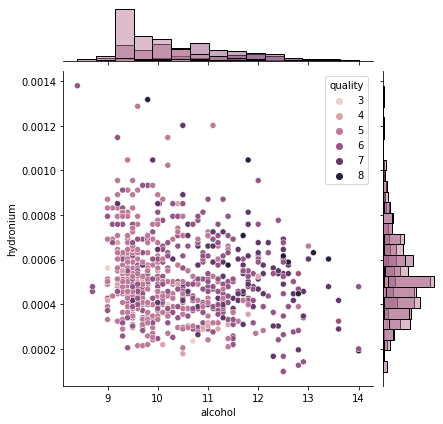

In [133]:
g = sns.JointGrid(data=trainred, x="alcohol", y="hydronium", hue="quality")
g.plot(sns.scatterplot, sns.histplot)

<AxesSubplot:>

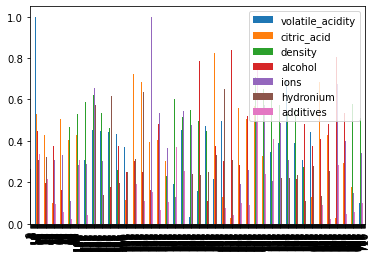

In [106]:
X_trainred_scaled.plot.bar()

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

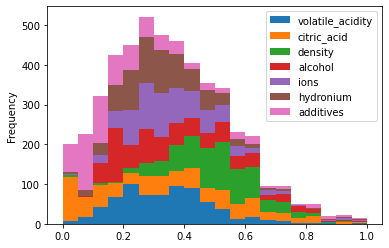

<Figure size 1152x720 with 0 Axes>

In [111]:

X_trainred_scaled.plot.hist(stacked=True, bins=20)
plt.figure(figsize=(16,10))

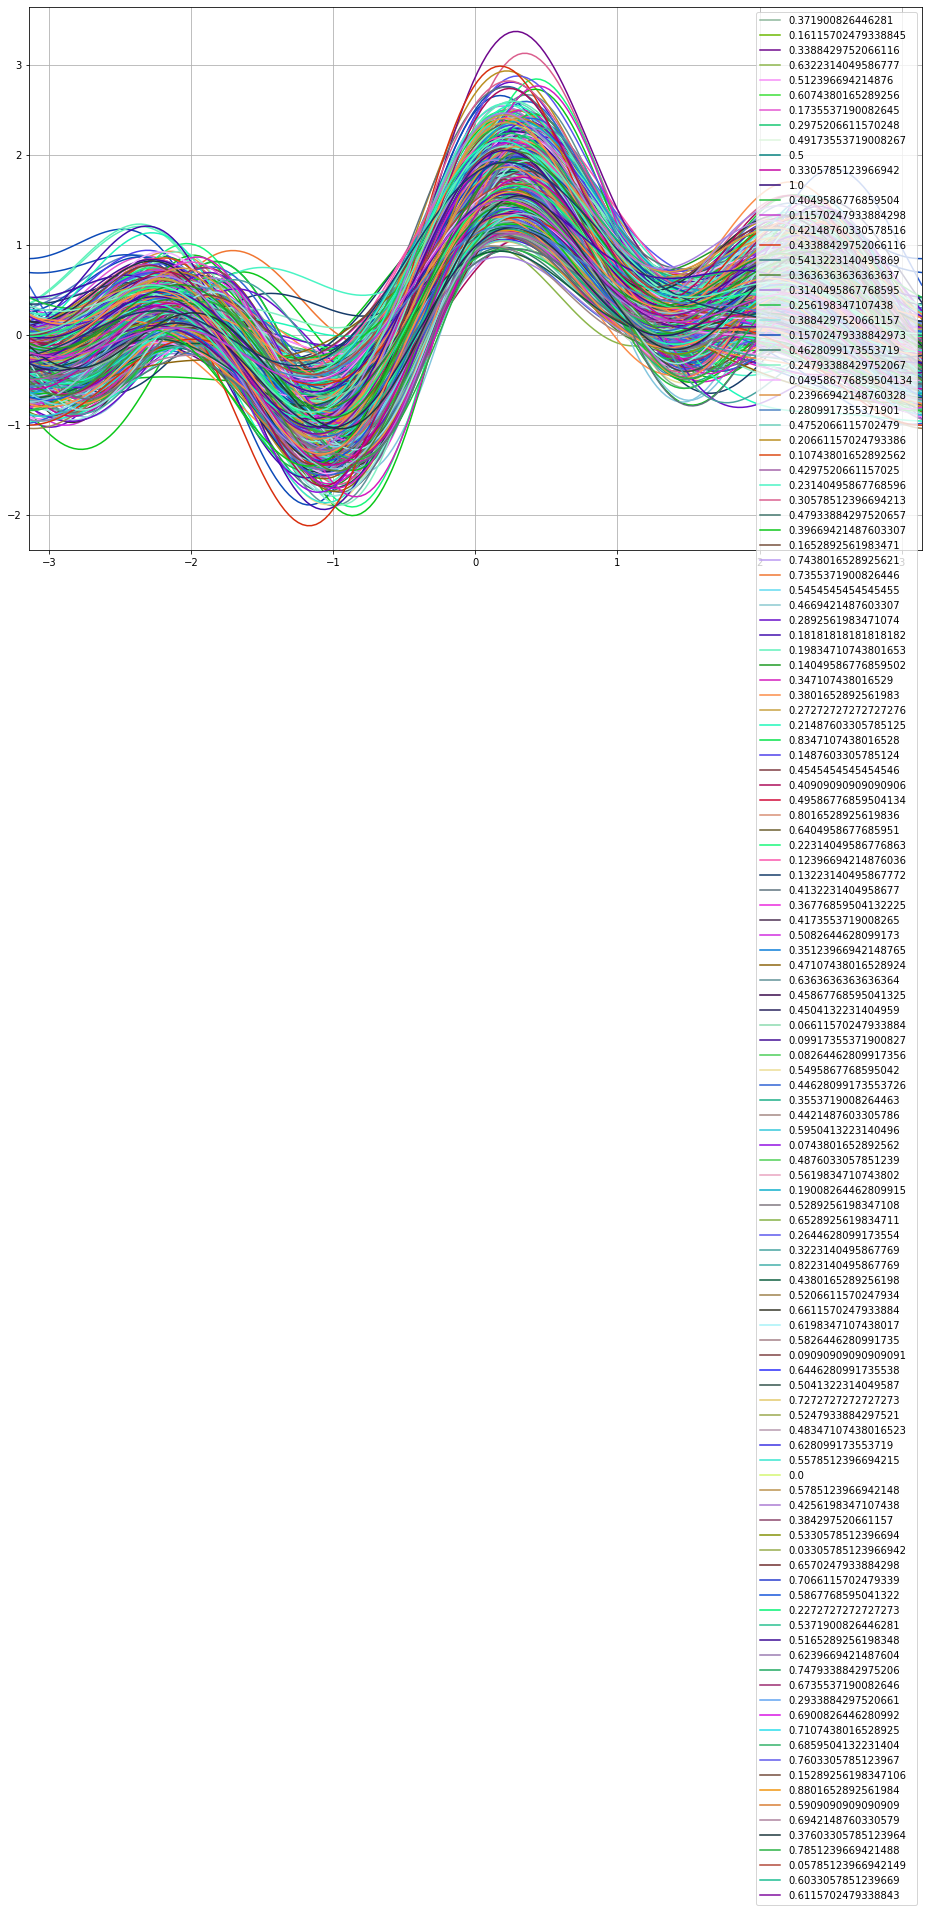

In [120]:
from pandas.plotting import andrews_curves

data = X_trainred_scaled

plt.figure(figsize=(16,10));

andrews_curves(data, "volatile_acidity");

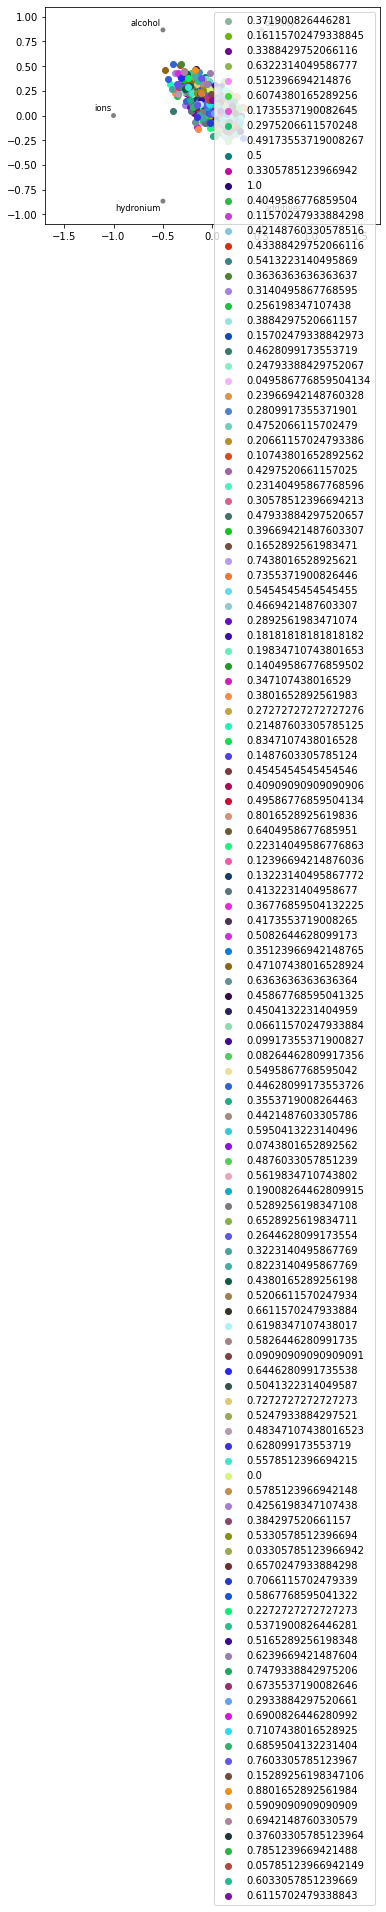

In [132]:
from pandas.plotting import radviz

data = X_trainred_scaled

plt.figure();

radviz(data, "volatile_acidity");

In [126]:
red.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'type',
 'ions',
 'hydronium',
 'additives']

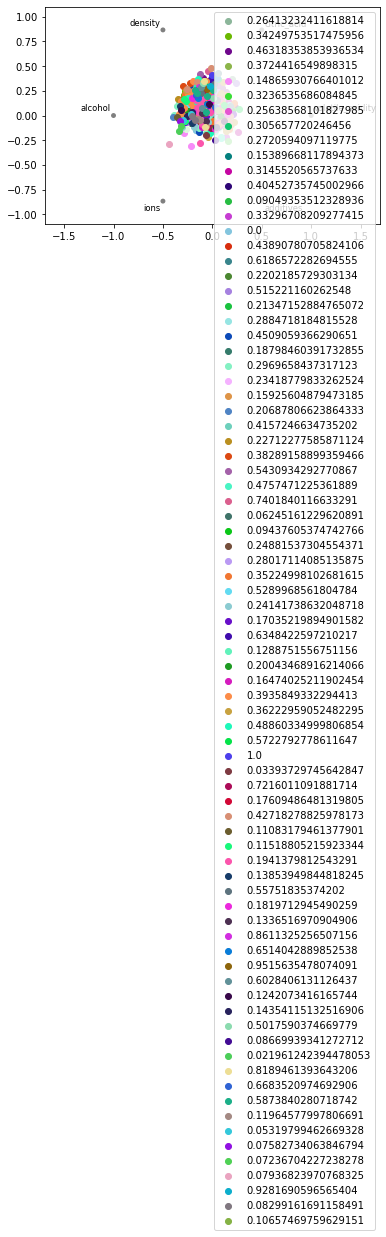

In [319]:
from pandas.plotting import radviz

data = X_trainred_scaled

plt.figure();

radviz(data, "hydronium");

In [327]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


KeyError: 0

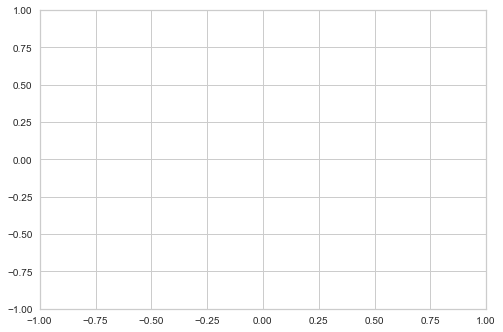

In [336]:
# from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz

# Load the classification dataset
X, y = X_trainred_scaled, y_trainred.quality

# Specify the target classes
classes = [3,4,5,6,7,8]

# Instantiate the visualizer
visualizer = RadViz(classes=classes)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [331]:
y_trainred.quality.info()

<class 'pandas.core.series.Series'>
Int64Index: 711 entries, 662 to 1160
Series name: quality
Non-Null Count  Dtype
--------------  -----
711 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [334]:
y_trainred.quality=y_trainred.quality.astype('int')